## Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, svm, naive_bayes
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import time
import re

### set da random seed

In [2]:
np.random.seed(500)

## Importar dataset previamente tratado

In [3]:
corpus_treino = pd.read_csv('data/corpus_treino_regex.csv', sep = ';')

In [6]:
corpus_treino.head()

,Unnamed: 0,id,review,sentiment,review_final
0,0,5814_8,"['with', 'all', 'this', 'stuff', 'going', 'dow...",1,"['stuff', 'go', 'moment', 'mj', 'start', 'list..."
1,1,2381_9,"['\\the', 'classic', 'war', 'of', 'the', 'worl...",1,"['classic', 'war', 'timothy', 'hines', 'entert..."
2,2,7759_3,"['the', 'film', 'starts', 'with', 'a', 'manage...",0,"['film', 'start', 'manager', 'nicholas', 'bell..."
3,3,3630_4,"['it', 'must', 'be', 'assumed', 'that', 'those...",0,"['must', 'assume', 'praise', 'film', 'great', ..."
4,4,9495_8,"['superbly', 'trashy', 'and', 'wondrously', 'u...",1,"['superbly', 'trashy', 'wondrously', 'unpreten..."


## Separar base em treino e teste
### 70% treino e 30% teste

In [4]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(corpus_treino['review_final'], corpus_treino['sentiment'],test_size=0.3)

## Encoding

In [5]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

## Vetorização

In [6]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(corpus_treino['review_final'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [7]:
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

## Aplicação dos modelos

### Vector Suport Machine

In [26]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)

### Naive Bayes

In [27]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)

### Random Forest

In [9]:
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)  
classifier.fit(Train_X_Tfidf, Train_Y)  
predictions_RF = classifier.predict(Test_X_Tfidf)

## Obtenção dos SCORES de cada modelo

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (3,3))

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

In [28]:
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
print("SVM f1 Score -> ",f1_score(predictions_SVM, Test_Y, average="macro")*100)
print("SVM Precision Score -> ",precision_score(predictions_SVM, Test_Y, average="macro")*100)
print("SVM Recall Score -> ",recall_score(predictions_SVM, Test_Y, average="macro")*100)

SVM Accuracy Score ->  87.70666666666666
SVM f1 Score ->  87.70213318104253
SVM Precision Score ->  87.69677506218217
SVM Recall Score ->  87.71299766875286


In [29]:
print(confusion_matrix(Test_Y,predictions_SVM))  

[[3217  482]
 [ 440 3361]]


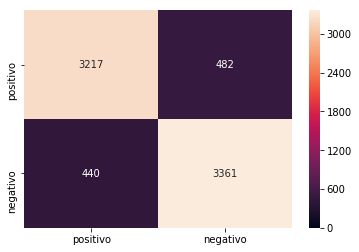

In [30]:
cm = confusion_matrix(Test_Y,predictions_SVM)
sns.heatmap(cm, annot = True, vmin=0, fmt='g', xticklabels=['positivo', 'negativo'], yticklabels=['positivo', 'negativo'])

In [31]:
print("NB Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)
print("NB f1 Score -> ",f1_score(predictions_NB, Test_Y, average="macro")*100)
print("NB Precision Score -> ",precision_score(predictions_NB, Test_Y, average="macro")*100)
print("NB Recall Score -> ",recall_score(predictions_NB, Test_Y, average="macro")*100)

NB Accuracy Score ->  85.01333333333334
NB f1 Score ->  85.01195203483286
NB Precision Score ->  85.01600189304347
NB Recall Score ->  85.01062326647897


In [32]:
print(confusion_matrix(Test_Y,predictions_NB))

[[3152  547]
 [ 577 3224]]


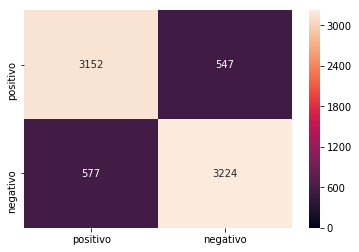

In [33]:
cm = confusion_matrix(Test_Y,predictions_NB)
sns.heatmap(cm, annot = True, vmin=0, fmt='g', xticklabels=['positivo', 'negativo'], yticklabels=['positivo', 'negativo'])

In [34]:
print("Random Forest Accuracy Score -> ",accuracy_score(predictions_RF, Test_Y)*100)
print("Random Forest f1 Score -> ",f1_score(predictions_RF, Test_Y, average="macro")*100)
print("Random Forest Precision Score -> ",precision_score(predictions_RF, Test_Y, average="macro")*100)
print("Random Forest Recall Score -> ",recall_score(predictions_RF, Test_Y, average="macro")*100)

Random Forest Accuracy Score ->  85.02666666666666
Random Forest f1 Score ->  85.02666427093295
Random Forest Precision Score ->  85.041852007614
Random Forest Recall Score ->  85.04111180242437


In [35]:
print(confusion_matrix(Test_Y,predictions_RF))  

[[3187  512]
 [ 611 3190]]


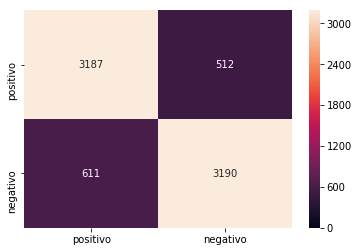

In [36]:
cm = confusion_matrix(Test_Y,predictions_RF)
sns.heatmap(cm, annot = True, vmin=0, fmt='g', xticklabels=['positivo', 'negativo'], yticklabels=['positivo', 'negativo'])